In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import ConfusionMatrixDisplay
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
#reading csv file from kaggle
data=pd.read_csv("car_price_prediction.csv")
data.sample(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2060,45772844,706,645,LEXUS,CT 200h,2011,Hatchback,Yes,Hybrid,1.8,116869 km,4.0,Automatic,Front,04-May,Left wheel,Black,0
17657,45732642,20344,891,HYUNDAI,Sonata,2016,Sedan,Yes,Petrol,2,44608 km,4.0,Automatic,Front,04-May,Left wheel,White,4
10561,45797180,26017,831,HYUNDAI,Elantra,2017,Sedan,Yes,Petrol,1.6,107220 km,4.0,Automatic,Front,04-May,Left wheel,White,4
8922,45813742,15210,463,TOYOTA,Prius,2018,Sedan,Yes,Hybrid,1.8,12416 km,4.0,Automatic,Front,04-May,Left wheel,White,12
3086,45647003,84675,-,TOYOTA,Land Cruiser Prado,2014,Jeep,Yes,Diesel,3.0 Turbo,137000 km,6.0,Tiptronic,4x4,>5,Left wheel,Black,12
15562,45813189,4704,382,FORD,Fusion,2015,Sedan,Yes,Hybrid,2,148709 km,4.0,Automatic,Front,04-May,Left wheel,Red,12
5583,45728756,32035,707,SSANGYONG,REXTON,2011,Jeep,Yes,Diesel,2,53323 km,4.0,Automatic,Front,04-May,Left wheel,Black,4
16072,45769826,1490,1360,LEXUS,GX 470,2013,Jeep,Yes,Petrol,4.6,154115 km,8.0,Automatic,4x4,04-May,Left wheel,Black,0
15218,45742077,21639,751,KIA,Optima hybrid,2013,Sedan,Yes,Hybrid,2.4,89000 km,4.0,Tiptronic,Front,04-May,Left wheel,White,12
10920,45809192,41400,833,CHEVROLET,Captiva,2015,Jeep,Yes,Diesel,2.2,70003 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4


In [6]:
#displaying detail information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [7]:
#performing statistical analysis
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [8]:
#checking null values in data
data.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [9]:
#ananlyzing corelation between labels
correl=data.corr()
print(correl)

                  ID     Price  Prod. year  Cylinders   Airbags
ID          1.000000 -0.000844    0.071352  -0.039319 -0.020527
Price      -0.000844  1.000000    0.012982   0.007518 -0.012824
Prod. year  0.071352  0.012982    1.000000  -0.096797  0.236969
Cylinders  -0.039319  0.007518   -0.096797   1.000000  0.176868
Airbags    -0.020527 -0.012824    0.236969   0.176868  1.000000


<AxesSubplot:>

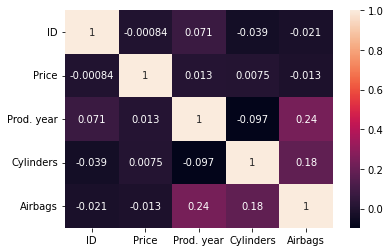

In [10]:
#visualizing data corelation
sns.heatmap(correl,annot=True)

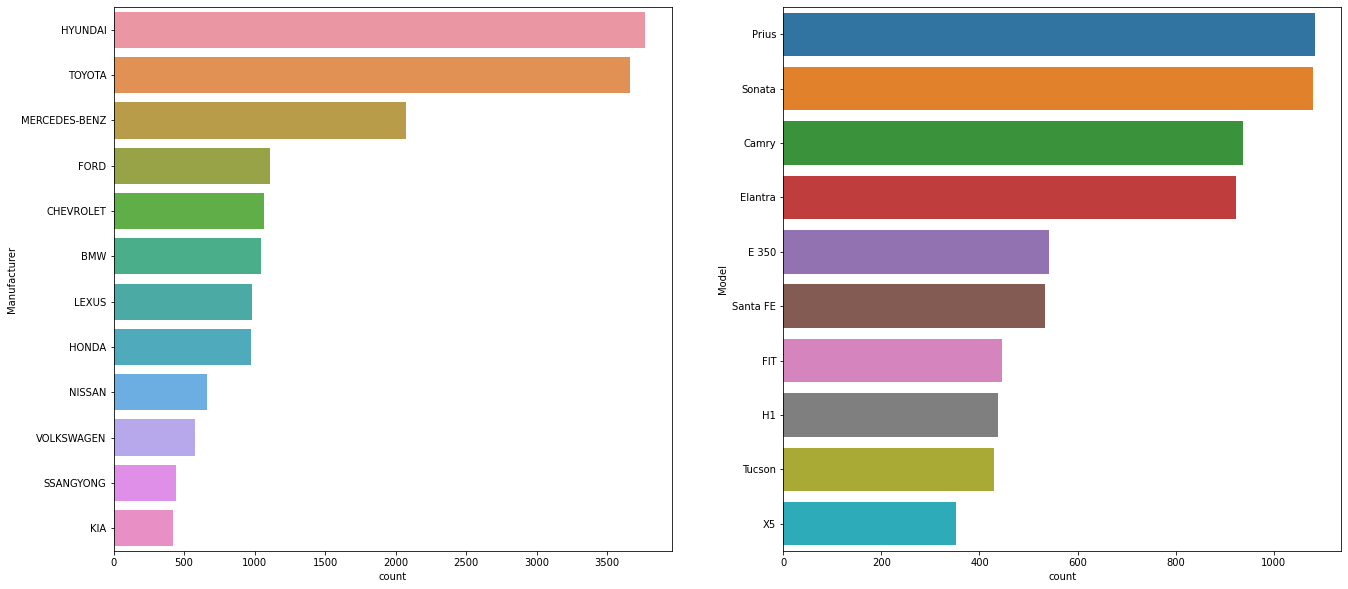

In [11]:
#visualizing Manufacture Company with thier Model Productions
fig, ax =plt.subplots(1,2,figsize=(22, 10))
sns.countplot(y ='Model',data = data,order=data.Model.value_counts().iloc[:10].index, ax = ax[1] )
sns.countplot(y ='Manufacturer',data = data,order=data.Manufacturer.value_counts().iloc[:12].index,ax=ax[0])
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


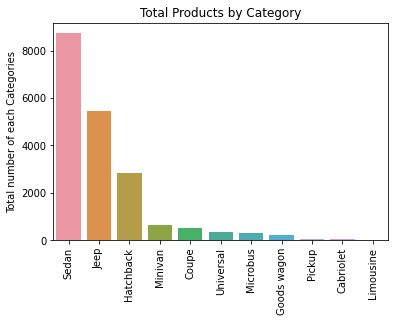

In [12]:
Cate_count=data['Category'].value_counts()
#sns.set(style="whitegrid")
sns.barplot(Cate_count.index,Cate_count.values)
plt.title("Total Products by Category")
plt.xticks(rotation='vertical')
plt.ylabel("Total number of each Categories")
plt.show()

In [13]:
#we can fit the model only numerical values not categorical thats why applying encoding techniques
le=LabelEncoder()
data['Leather interior']=le.fit_transform(data['Leather interior'])
data['Leather interior'].value_counts()

1    13954
0     5283
Name: Leather interior, dtype: int64

In [14]:
#help(plt.bar)

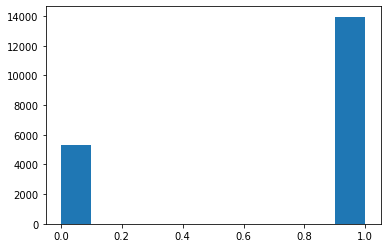

In [15]:
plt.hist(data['Leather interior'],label="Leather Interior")
plt.show()  

In [16]:
data['Gear box type'].value_counts()

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: Gear box type, dtype: int64

/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


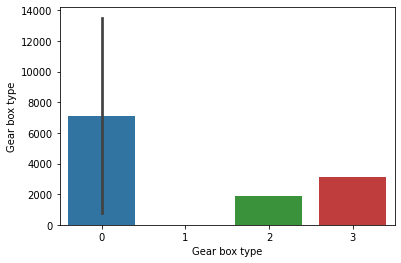

In [17]:
data['Gear box type']=le.fit_transform(data['Gear box type'])
x=data['Gear box type']
y=data['Gear box type'].value_counts()
sns.barplot(x,y)
plt.show()

In [29]:
data['Fuel type']=le.fit_transform(data['Fuel type'])
data['Fuel type'].unique()

array([2, 5, 1, 0, 6, 4, 3])

In [30]:
data['Manufacturer']=le.fit_transform(data['Manufacturer'])
data['Manufacturer']

0        32
1         8
2        21
3        16
4        21
         ..
19232    36
19233    23
19234    23
19235     8
19236    23
Name: Manufacturer, Length: 19237, dtype: int64

In [31]:
data.columns

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

In [32]:

feature_data=data[['Manufacturer','Airbags','Cylinders','Gear box type','Fuel type']]
feature_data.head()


,Manufacturer,Airbags,Cylinders,Gear box type,Fuel type
0,32,12,6.0,0,2
1,8,8,6.0,2,5
2,21,2,4.0,3,5
3,16,0,4.0,0,2
4,21,4,4.0,0,5


In [33]:
for cols in feature_data.columns[0:]:
    print(cols,':',len(feature_data[cols].unique()),"Labels")
    

Manufacturer : 65 Labels
Airbags : 17 Labels
Cylinders : 13 Labels
Gear box type : 4 Labels
Fuel type : 7 Labels


Frequency_Manu=data1.Manufacturer.value_counts().to_dict()
Frequency_Model=data1.Model.value_counts().to_dict()
Frequency_Cat=data1.Category.value_counts().to_dict()

data.Manufacturer=data1.Manufacturer.map(Frequency_Manu)
data.Model=data1.Model.map(Frequency_Model)
data.Category=data1.Category.map(Frequency_Cat)

In [34]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,32,RX 450,2010,Jeep,1,2,3.5,186005 km,6.0,0,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,8,Equinox,2011,Jeep,0,5,3,192000 km,6.0,2,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,21,FIT,2006,Hatchback,0,5,1.3,200000 km,4.0,3,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,16,Escape,2011,Jeep,1,2,2.5,168966 km,4.0,0,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,21,FIT,2014,Hatchback,1,5,1.3,91901 km,4.0,0,Front,04-May,Left wheel,Silver,4


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  int64  
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  int64  
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  int64  
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
#data['Cylinders']=data['Cylinders'].astype(float).astype(int)

In [ ]:
#data.drop(['Engine volume'],axis=1)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,32,RX 450,2010,Jeep,1,2,186005 km,6,0,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,8,Equinox,2011,Jeep,0,5,192000 km,6,2,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,21,FIT,2006,Hatchback,0,5,200000 km,4,3,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,16,Escape,2011,Jeep,1,2,168966 km,4,0,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,21,FIT,2014,Hatchback,1,5,91901 km,4,0,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,36,CLK 200,1999,Coupe,1,0,300000 km,4,1,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,23,Sonata,2011,Sedan,1,5,161600 km,4,2,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,23,Tucson,2010,Jeep,1,1,116365 km,4,0,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,8,Captiva,2007,Jeep,1,1,51258 km,4,0,Front,04-May,Left wheel,Black,4


In [ ]:
#data['Mileaga']=data['Mileage'].str.replace('km',' ')
#data['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [ ]:
from google.colab import drive      
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#feature_data=data.iloc[:,3:13]
#feature_data.head()
#feature_data=feature_data.drop('Engine volume',axis=1)

In [35]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Manufacturer   19237 non-null  int64  
 1   Airbags        19237 non-null  int64  
 2   Cylinders      19237 non-null  float64
 3   Gear box type  19237 non-null  int64  
 4   Fuel type      19237 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 751.6 KB


In [ ]:
#feature_data['Mileage']=feature_data['Mileage'].str.replace("km","")

In [36]:
X=feature_data
Y=data['Price']
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn import svm
#X.info()

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.2)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(15389, 5) (15389,) (3848, 5) (3848,)


In [38]:
logic=LogisticRegression()
logic.fit(x_train,y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [53]:
y_pred=logic.predict(x_test)

In [ ]:
ConfusionMatrixDisplay.from_estimator(logic, x_test, y_test)
plt.show()

In [54]:
print("accuracy score=",metrics.accuracy_score(y_test,y_pred))

accuracy score= 0.02312889812889813


In [ ]:
print("Pression is:",metrics.precision_score(y_test,y_pred,average="micro"))

In [ ]:
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)

In [ ]:
y_pred=model.predict(x_test)

0.034563409563409565


In [ ]:
print("Pression is:",metrics.precision_score(y_test,y_pred,average="micro"))

Pression is: 0.034563409563409565


In [28]:
print("recall is:",metrics.recall_score(y_test,y_pred,average="micro"))

recall is: 0.034563409563409565


In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 5)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=5)

In [31]:
y_pred=classifier.predict(x_test)
print(y_pred)

res=classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)




result=accuracy_score(y_test,y_pred,normalize=False)
print(result)




[12570 27284 16308 ...   549 15681 10663]
197


In [32]:
print("Pression is:",metrics.precision_score(y_test,y_pred,average="micro"))

Pression is: 0.0511954261954262


In [33]:
print("Pression is:",metrics.recall_score(y_test,y_pred,average="micro"))

Pression is: 0.0511954261954262


In [2]:
import pickle
modelsave='car_price_prediction.csv'
pickle.dump(res,open(modelsave,'wb'))

NameError: name 'res' is not defined

In [21]:
# calling the saved model
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.885318617534324
